In [2]:
# A lot of code here is simplified and sourced from https://nextjournal.com/gkoehler/digit-recognition-with-keras

In [2]:
%matplotlib inline
# %matplotlib ipympl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=6,6

import numpy as np
from keras.utils import np_utils

In [3]:
from keras.datasets import mnist

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

import tensorflow as tf

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

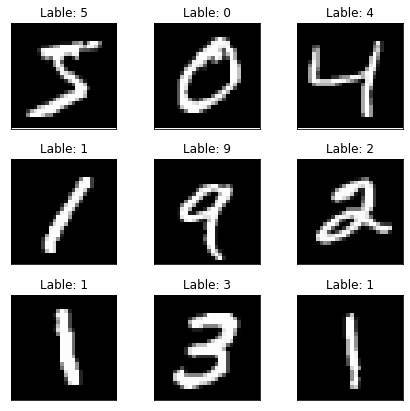

In [5]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Lable: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# 255 Channels so a range of 255 for black to white
np.amax(X_train) - np.amin(X_train)

255.0

In [9]:
# We normalise to get x between 0 and 1
X_train_norma = X_train / 255
X_train_norm = np.expand_dims(X_train_norma, axis=3)
X_test_norma = X_test / 255
X_test_norm = np.expand_dims(X_test_norma, axis=3)
np.amax(X_train_norm) - np.amin(X_train_norm)

1.0

Text(0, 0.5, 'Density')

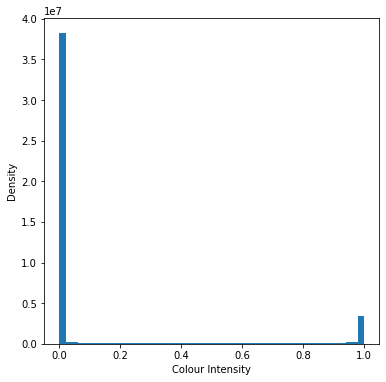

In [10]:
# Distribution of Pixel Values
plt.hist(X_train_norm.flatten(), bins = (50))
plt.xlabel('Colour Intensity')
plt.ylabel('Density')

In [11]:
# Training values into catogories

n_classes = 10
print(y_train[2])
y_train_norm = np_utils.to_categorical(y_train, n_classes)
y_test_norm = np_utils.to_categorical(y_test, n_classes)
print(y_train_norm[2])
print([0,1,2,3,4,5,6,7,8,9])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [12]:
model = Sequential()

model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu', name="conv"))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())


model.add(Dense(30, activation="relu", name="1"))
model.add(Dropout(0.3))
model.add(Dense(30, activation="relu", name="2"))

# Convert from 10 numbers into relative probability (So total probability of each digit = 1)
model.add(Dense(10, activation="softmax", name="classification"))

In [13]:
X_test_norm[0].shape
y_test_norm.shape

(10000, 10)

In [14]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
history = model.fit(X_train_norm, y_train_norm,
          batch_size=64, epochs=10,
          verbose=2,
          validation_data=(X_test_norm, y_test_norm))

Epoch 1/10
938/938 - 30s - loss: 0.4073 - accuracy: 0.8712 - val_loss: 0.0776 - val_accuracy: 0.9766
Epoch 2/10
938/938 - 31s - loss: 0.1632 - accuracy: 0.9513 - val_loss: 0.0535 - val_accuracy: 0.9836
Epoch 3/10
938/938 - 36s - loss: 0.1239 - accuracy: 0.9626 - val_loss: 0.0537 - val_accuracy: 0.9827
Epoch 4/10
938/938 - 37s - loss: 0.1028 - accuracy: 0.9686 - val_loss: 0.0465 - val_accuracy: 0.9855
Epoch 5/10
938/938 - 40s - loss: 0.0929 - accuracy: 0.9717 - val_loss: 0.0407 - val_accuracy: 0.9869
Epoch 6/10
938/938 - 40s - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 7/10
938/938 - 38s - loss: 0.0795 - accuracy: 0.9754 - val_loss: 0.0387 - val_accuracy: 0.9878
Epoch 8/10
938/938 - 37s - loss: 0.0747 - accuracy: 0.9767 - val_loss: 0.0377 - val_accuracy: 0.9881
Epoch 9/10
938/938 - 47s - loss: 0.0720 - accuracy: 0.9779 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 10/10
938/938 - 42s - loss: 0.0670 - accuracy: 0.9793 - val_loss: 0.0369 - val_accura

In [16]:
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])

Training Loss: 0.06701798737049103
Training Accuracy: 0.979283332824707


In [17]:
print("Test Accuracy:", model.evaluate(X_test_norm, y_test_norm)[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0369 - accuracy: 0.9901
Test Accuracy: 0.9901000261306763


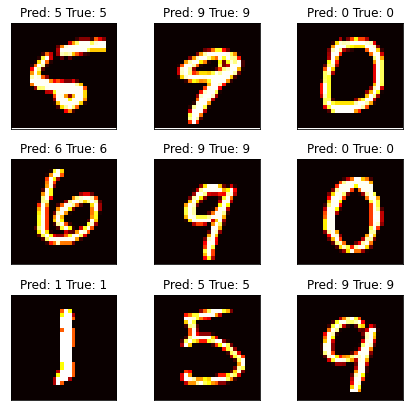

In [18]:
y_pred = model.predict(X_test_norm)


fig = plt.figure()
for i in range(8,17):
  plt.subplot(3,3,i+1 - 8)
  plt.tight_layout()
  plt.imshow(X_test[i], cmap='hot', interpolation='none')
  plt.title("Pred: {} True: {}".format(np.argmax(y_pred[i]), y_test[i]))
  plt.xticks([])
  plt.yticks([])

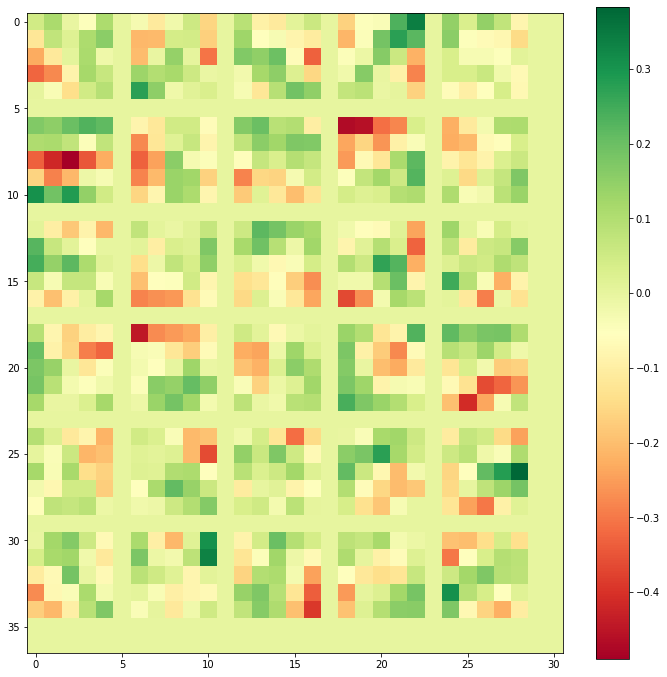

In [19]:
plt.rcParams["figure.figsize"]=12,12
heatmap = np.zeros([6*6+1,6*5+1])
weights_layer = model.get_layer("conv").get_weights()[0]
for x in range(6):
    for y in range(5):
        if x + y < 30:
            heatmap[x*6:x*6+5, y*6:y*6+5] = weights_layer[:, :, 0, x * 5 + y]
        
plt.imshow(heatmap, cmap='RdYlGn')
plt.colorbar()

In [20]:
plt.rcParams["figure.figsize"]=6,6